In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import glob
import collections
import numpy as np
from tqdm import tqdm
from PIL import Image

In [0]:
os.chdir('gdrive/My Drive/hotdog_data')

In [4]:
image_list = []
for filename in tqdm(glob.glob('train/hotdog/*.jpg')):
    im = Image.open(filename).convert('RGB')  # in case some are grayscale
    image_list.append((im, 1))

100%|██████████| 708/708 [03:17<00:00,  3.58it/s]


In [5]:
for filename in tqdm(glob.glob('train/not_hotdog/*.jpg')):
    im = Image.open(filename).convert('RGB')
    image_list.append((im, 0))

100%|██████████| 963/963 [04:27<00:00,  3.59it/s]


In [6]:
sizes = [pair[0].size for pair in image_list]
collections.Counter(sizes).most_common(10)

[((500, 375), 514),
 ((500, 333), 155),
 ((375, 500), 138),
 ((333, 500), 60),
 ((500, 334), 40),
 ((500, 332), 30),
 ((500, 281), 20),
 ((500, 500), 17),
 ((400, 300), 16),
 ((640, 480), 15)]

Значит, 500x375 и вариации - это самый популярный размер изображения. Просто повернём все вертикальные изображения (второе измерение больше), и ресайзнем.

In [0]:
image_list = [(item[0].rotate(90, expand=True),item[1]) if item[0].size[0]<item[0].size[1] else item for item in image_list]

In [8]:
sizes = [pair[0].size for pair in image_list]
collections.Counter(sizes).most_common(10)

[((500, 375), 652),
 ((500, 333), 215),
 ((500, 334), 51),
 ((500, 332), 39),
 ((500, 281), 22),
 ((400, 300), 19),
 ((500, 500), 17),
 ((500, 335), 16),
 ((640, 480), 15),
 ((500, 400), 11)]

In [0]:
image_list = [(item[0].resize((500,375)),item[1]) for item in image_list]

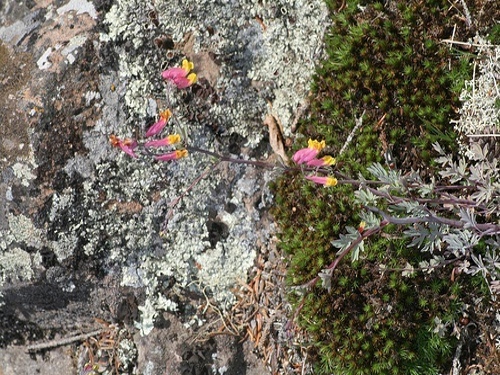

In [10]:
image_list[-1][0]

In [0]:
X_train = [np.array(item[0]) for item in image_list]
y_train = [item[1] for item in image_list]

# Задание 1. Классический алгоритм.

In [12]:
X_train_c = [image.reshape(-1,1) for image in X_train] # разворачиваем изображения в вектора для классического алгоритма
X_train_c[0].shape, X_train_c[2].shape

((562500, 1), (562500, 1))

In [0]:
X_train_c = np.array(X_train_c).reshape(1671, 562500)
y_train_c = np.array(y_train)

In [0]:
from sklearn.preprocessing import normalize  # нормализуем

In [0]:
X_train_c = normalize(X_train_c)

In [0]:
from sklearn.model_selection import train_test_split  # разделим на train / test

In [0]:
X_train_classic, X_test_classic, y_train_classic, y_test_classic = train_test_split(
    X_train_c, y_train, test_size=0.2, random_state=42)

In [0]:
from sklearn.svm import SVC

In [24]:
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier.fit(X_train_classic, y_train_classic)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
support_vector_classifier.score(X_test_classic, y_test_classic)

0.5462686567164179

Лишь немногим лучше случайной догадки. Признаков очень много, объём данных небольшой, так что SVM не слишком подходит для данной задачи. В следующем файле используем TF-Keras.